# Project: Wrangling and Analyze Data by NWANAGU James Ifeanyichukwu

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering

In [4]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = 'image_predictions.tsv'
response = requests.get(url)

with open (file_name, 'wb') as file:
    file.write(response.content)
prediction = pd.read_csv('image_predictions.tsv', sep = '\t')

In [7]:
import json

json_tweet = []

with open ('tweet_json.txt', 'r', encoding = 'UTF-8') as file:
    for i in file:
        text_json = json.loads(i)
        tweet_id = text_json['id']
        favourite = text_json['favorite_count']
        retweet = text_json['retweet_count']
        json_tweet.append({'tweet_id': tweet_id,
                       'favourite': favourite,
                       'retweet': retweet})
tweet = pd.DataFrame(json_tweet)

## Assessing Data

In [8]:
archive.sample(20)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
691   787322443945877504                    NaN                  NaN   
108   871515927908634625                    NaN                  NaN   
1967  673342308415348736                    NaN                  NaN   
54    881666595344535552                    NaN                  NaN   
197   854482394044301312                    NaN                  NaN   
1300  707693576495472641                    NaN                  NaN   
820   770414278348247044                    NaN                  NaN   
1978  672984142909456390                    NaN                  NaN   
2175  669214165781868544                    NaN                  NaN   
1539  689661964914655233                    NaN                  NaN   
1652  683481228088049664                    NaN                  NaN   
2136  670055038660800512                    NaN                  NaN   
1836  676098748976615425                    NaN                  NaN   
2117  670421925039075328                    NaN                  NaN   
369   828650029636317184                    NaN                  NaN   
650   792883833364439040                    NaN                  NaN   
2077  670833812859932673                    NaN                  NaN   
2278  667435689202614272                    NaN                  NaN   
1128  729823566028484608                    NaN                  NaN   
2225  668286279830867968                    NaN                  NaN   

                      timestamp  \
691   2016-10-15 16:01:13 +0000   
108   2017-06-04 23:56:03 +0000   
1967  2015-12-06 03:24:51 +0000   
54    2017-07-03 00:11:11 +0000   
197   2017-04-18 23:50:52 +0000   
1300  2016-03-09 22:24:31 +0000   
820   2016-08-30 00:14:12 +0000   
1978  2015-12-05 03:41:37 +0000   
2175  2015-11-24 18:01:05 +0000   
1539  2016-01-20 04:13:20 +0000   
1652  2016-01-03 02:53:17 +0000   
2136  2015-11-27 01:42:24 +0000   
1836  2015-12-13 17:57:57 +0000   
2117  2015-11-28 02:00:17 +0000   
369   2017-02-06 17:02:17 +0000   
650   2016-10-31 00:20:11 +0000   
2077  2015-11-29 05:16:59 +0000   
2278  2015-11-19 20:14:03 +0000   
1128  2016-05-10 00:01:12 +0000   
2225  2015-11-22 04:33:59 +0000   

                                                 source  \
691   <a href="http://twitter.com/download/iphone" r...   
108   <a href="http://twitter.com/download/iphone" r...   
1967  <a href="http://twitter.com/download/iphone" r...   
54    <a href="http://twitter.com/download/iphone" r...   
197   <a href="http://twitter.com/download/iphone" r...   
1300  <a href="http://twitter.com/download/iphone" r...   
820   <a href="http://twitter.com/download/iphone" r...   
1978  <a href="http://twitter.com/download/iphone" r...   
2175  <a href="http://twitter.com/download/iphone" r...   
1539  <a href="http://twitter.com/download/iphone" r...   
1652  <a href="http://twitter.com/download/iphone" r...   
2136  <a href="http://twitter.com/download/iphone" r...   
1836  <a href="http://twitter.com/download/iphone" r...   
2117  <a href="http://twitter.com/download/iphone" r...   
369   <a href="http://twitter.com/download/iphone" r...   
650   <a href="http://twitter.com/download/iphone" r...   
2077  <a href="http://twitter.com/download/iphone" r...   
2278  <a href="http://twitter.com/download/iphone" r...   
1128  <a href="http://twitter.com/download/iphone" r...   
2225  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
691   This is Lincoln. He forgot to use his blinker ...                  NaN   
108   This is Napolean. He's a Raggedy East Nicaragu...                  NaN   
1967  This is Django. He's a skilled assassin pupper...                  NaN   
54    This is Gary. He couldn't miss this puppertuni...                  NaN   
197   This is Arya. She can barely contain her excit...                  NaN   
1300  This is Jiminus. He's in a tub for some r

In [9]:
archive.shape

(2356, 17)

In [10]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
sum(archive.duplicated())

0

In [12]:
archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [13]:
archive[archive.expanded_urls.isnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
113   870726314365509632           8.707262e+17         1.648776e+07   
148   863427515083354112           8.634256e+17         7.759620e+07   
179   857214891891077121           8.571567e+17         1.806710e+08   
185   856330835276025856                    NaN                  NaN   
186   856288084350160898           8.562860e+17         2.792810e+08   
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
218   850333567704068097           8.503288e+17         2.195506e+07   
228   848213670039564288           8.482121e+17         4.196984e+09   
234   847617282490613760           8.476062e+17         4.196984e+09   
274   840698636975636481           8.406983e+17         8.405479e+17   
290   838150277551247360           8.381455e+17         2.195506e+07   
291   838085839343206401           8.380855e+17         2.894131e+09   
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
346   831926988323639298           8.319030e+17         2.068372e+07   
375   828361771580813312                    NaN                  NaN   
387   826598799820865537           8.265984e+17         4.196984e+09   
409   823333489516937216           8.233264e+17         1.582854e+09   
427   821153421864615936           8.211526e+17         1.132119e+08   
498   813130366689148928           8.131273e+17         4.196984e+09   
513   811647686436880384           8.116272e+17         4.196984e+09   
570   801854953262350336           8.018543e+17         1.185634e+07   
576   800859414831898624           8.008580e+17         2.918590e+08   
611   797165961484890113           7.971238e+17         2.916630e+07   
701   786051337297522688           7.727430e+17         7.305050e+17   
707   785515384317313025                    NaN                  NaN   
843   766714921925144576           7.667118e+17         4.196984e+09   
857   763956972077010945           7.638652e+17         1.584641e+07   
967   750381685133418496           7.501805e+17         4.717297e+09   
1005  747651430853525504           7.476487e+17         4.196984e+09   
1080  738891149612572673           7.384119e+17         3.589728e+08   
1295  707983188426153984           7.079801e+17         2.319108e+09   
1345  704491224099647488           7.044857e+17         2.878549e+07   
1445  696518437233913856                    NaN                  NaN   
1446  696490539101908992           6.964887e+17         4.196984e+09   
1474  693644216740769793           6.936422e+17         4.196984e+09   
1479  693582294167244802           6.935722e+17         1.198989e+09   
1497  692423280028966913           6.924173e+17         4.196984e+09   
1523  690607260360429569           6.903413e+17         4.670367e+08   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1605  685681090388975616           6.855479e+17         4.196984e+09   
1618  684969860808454144           6.849598e+17         4.196984e+09   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1689  681340665377193984           6.813394e+17         4.196984e+09   
1774  678023323247357953           6.780211e+17         4.196984e+09   
1819  676590572941893632           6.765883e+17         4.196984e+09   
1844  675849018447167488           6.758457e+17         4.196984e+09   
1895  674742531037511680           6.747400e+17         4.196984e+09   
1905  674606911342424069           6.744689e+17         4.196984e+09   
1914  674330906434379776           6.658147e+17         1.637468e+07   
1940  673716320723169284           6.737159e+17         

In [14]:
archive.text.unique()

array(["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
       ...,
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj'],
      dtype=object)

In [15]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [16]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [17]:
archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [18]:
archive.name[archive.name.apply(lambda x: len(x) <=3)].unique()

array(['Jax', 'Ted', 'Jim', 'Gus', 'Rey', 'a', 'Aja', 'Jed', 'Leo', 'Ken',
       'Max', 'Ava', 'Eli', 'Ash', 'not', 'Mia', 'one', 'Ike', 'Mo', 'Bo',
       'Tom', 'Alf', 'Sky', 'Tyr', 'Moe', 'Sam', 'Ito', 'Doc', 'mad',
       'Jay', 'Mya', 'an', 'O', 'Al', 'Lou', 'my', 'Eve', 'Dex', 'Ace',
       'Zoe', 'Blu', 'his', 'all', 'Sid', 'old', 'Ole', 'Bob', 'the',
       'Obi', 'by', 'Evy', 'Tug', 'Jeb', 'Dot', 'Mac', 'Ed', 'Taz', 'Cal',
       'JD', 'Pip', 'Amy', 'Gin', 'Edd', 'Ben', 'Dug', 'Jo', 'Ron', 'Stu'],
      dtype=object)

In [19]:
archive.name[archive.name.str.islower()].value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

In [20]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [21]:
for dogs in archive.columns[-4:]:
    print(archive[dogs].unique())

['None' 'doggo']
['None' 'floofer']
['None' 'pupper']
['None' 'puppo']


In [22]:
for i in archive.columns[-4:]:
    print(archive[i].value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [23]:
prediction.sample(20)

tweet_id                                            jpg_url  \
1820  834458053273591808    https://pbs.twimg.com/media/C5SXK89XUAQg7GX.jpg   
1867  843856843873095681    https://pbs.twimg.com/media/C7X7Ui0XgAA3m19.jpg   
1877  846042936437604353    https://pbs.twimg.com/media/C72_iaUVUAEhZSn.jpg   
313   671561002136281088    https://pbs.twimg.com/media/CVHdK-7WwAAsuyc.jpg   
1298  752334515931054080  https://pbs.twimg.com/ext_tw_video_thumb/75233...   
1176  737678689543020544    https://pbs.twimg.com/media/CjzC2oGWYAAyIfG.jpg   
1814  833722901757046785    https://pbs.twimg.com/media/C5H6jmgW8AAevqq.jpg   
750   687826841265172480    https://pbs.twimg.com/media/CYum3KbWEAArFrI.jpg   
1646  808501579447930884    https://pbs.twimg.com/media/Czhf4XtVQAAIqpd.jpg   
1738  822244816520155136    https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg   
1934  859851578198683649    https://pbs.twimg.com/media/C-7OcfyXsAAsqzU.jpg   
805   691756958957883396    https://pbs.twimg.com/media/CZmdSD8UcAAnY5R.jpg   
931   703079050210877440    https://pbs.twimg.com/media/CcHWqQCW8AEb0ZH.jpg   
1387  766078092750233600    https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg   
541   677187300187611136    https://pbs.twimg.com/media/CWXaQMBWcAAATDi.jpg   
1144  730211855403241472    https://pbs.twimg.com/media/CiI7zVZUoAEzGW7.jpg   
1248  747816857231626240    https://pbs.twimg.com/media/CmDHdCoWkAACTB4.jpg   
2068  890971913173991426    https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg   
1710  818259473185828864    https://pbs.twimg.com/media/C1sKo_QUkAALtkw.jpg   
140   668544745690562560    https://pbs.twimg.com/media/CUcl5jeWsAA6ufS.jpg   

      img_num                           p1   p1_conf  p1_dog  \
1820        1          Rhodesian_ridgeback  0.468619    True   
1867        1           Labrador_retriever  0.922540    True   
1877        1             golden_retriever  0.961110    True   
313         1                Gordon_setter  0.469373    True   
1298        1           Bedlington_terrier  0.399163    True   
1176        1                     Pembroke  0.935307    True   
1814        1  West_Highland_white_terrier  0.918144    True   
750         1                   Pomeranian  0.997210    True   
1646        2                     Airedale  0.454239    True   
1738        1                      Samoyed  0.585441    True   
1934        4           Labrador_retriever  0.899086    True   
805         1                Saint_Bernard  0.342571    True   
931         2                     Pembroke  0.778503    True   
1387        1                   toy_poodle  0.420463    True   
541         1               English_setter  0.282396    True   
1144        1                          pug  0.341663    True   
1248        1                     Pembroke  0.768923    True   
2068        1                  Appenzeller  0.341703    True   
1710        1          miniature_schnauzer  0.367368    True   
140         1                     bearskin  0.427870   False   

                           p2   p2_conf  p2_dog                        p3  \
1820                  whippet  0.177531    True                   redbone   
1867         golden_retriever  0.074358    True            Great_Pyrenees   
1877       Labrador_retriever  0.016695    True           Tibetan_mastiff   
313   black-and-tan_coonhound  0.270893    True                Rottweiler   
1298          standard_poodle  0.086425    True   wire-haired_fox_terrier   
1176                 Cardigan  0.049874    True                 Chihuahua   
1814              Maltese_dog  0.025721    True          Lakeland_terrier   
750                  Pekinese  0.000803    True                  keeshond   
1646           cocker_spaniel  0.219323    True             Irish_terrier   
1738               Pomeranian  0.193654    True                Arctic_fox   
1934         golden_retriever  0.047091    True                    kuvasz   
805                     boxer  0.289096    True                  Pembroke   
931       

In [24]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [25]:
prediction.shape

(2075, 12)

In [26]:
prediction.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [27]:
sum(prediction.duplicated())

0

In [28]:
prediction.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [29]:
prediction.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [30]:
prediction.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [31]:
predict = (~prediction.p1_dog) & (~prediction.p2_dog) & (~prediction.p3_dog)
false_predict = prediction[predict]
false_predict.sample(20)

tweet_id                                          jpg_url  \
1371  762316489655476224  https://pbs.twimg.com/media/CpRKzZKWAAABGh7.jpg   
364   672884426393653248  https://pbs.twimg.com/media/CVaQ0M4UsAAki3t.jpg   
1725  820078625395449857  https://pbs.twimg.com/media/C2GBJADWIAQvcNb.jpg   
785   690248561355657216  https://pbs.twimg.com/media/CZRBZ9mWkAAWblt.jpg   
337   672231046314901505  https://pbs.twimg.com/media/CVQ-kfWWoAAXV15.jpg   
209   669972011175813120  https://pbs.twimg.com/media/CUw3_QiUEAA8cT9.jpg   
18    666268910803644416  https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
1396  767884188863397888  https://pbs.twimg.com/media/CqgSl4DWcAA-x-o.jpg   
212   670037189829525505  https://pbs.twimg.com/media/CUxzQ-nWIAAgJUm.jpg   
1549  792913359805018113  https://pbs.twimg.com/media/CwD-eCLWIAA6v0B.jpg   
1567  794205286408003585  https://pbs.twimg.com/media/CwWVe_3WEAAHAvx.jpg   
470   675113801096802304  https://pbs.twimg.com/media/CV58a4nXAAApywo.jpg   
414   674008982932058114  https://pbs.twimg.com/media/CVqPkVoU4AAkXA7.jpg   
1138  729113531270991872  https://pbs.twimg.com/media/Ch5U4FzXEAAShhF.jpg   
321   671855973984772097  https://pbs.twimg.com/media/CVLpciDW4AAleh-.jpg   
402   673697980713705472  https://pbs.twimg.com/media/CVl0vFeWoAAMTfg.jpg   
1956  864873206498414592  https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg   
78    667443425659232256  https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg   
357   672609152938721280  https://pbs.twimg.com/media/CVWWdKLWEAEnSk7.jpg   
753   688179443353796608  https://pbs.twimg.com/media/CYznjAcUEAQ5Zq7.jpg   

      img_num                p1   p1_conf  p1_dog              p2   p2_conf  \
1371        1      African_grey  0.270468   False  Madagascar_cat  0.076187   
364         1            tusker  0.122410   False         warthog  0.119870   
1725        3        school_bus  0.999833   False             cab  0.000160   
785         1     motor_scooter  0.382690   False           moped  0.318017   
337         1      killer_whale  0.823919   False      grey_whale  0.036601   
209         1             teddy  0.953071   False           koala  0.007027   
18          1  desktop_computer  0.086502   False            desk  0.085547   
1396        3        coral_reef  0.327740   False           cliff  0.157182   
212         1               pot  0.273767   False            tray  0.092888   
1549        4          web_site  0.226716   False         lighter  0.081941   
1567        3          pedestal  0.662660   False        fountain  0.294827   
470         1               bow  0.168020   False           quill  0.108807   
414         1     jigsaw_puzzle  0.970810   False      prayer_rug  0.011048   
1138        2        stone_wall  0.606188   False          prison  0.064831   
321         1        chimpanzee  0.636031   False         gorilla  0.098751   
402         1         porcupine  0.151876   False             hen  0.111380   
1956        2              pole  0.478616   False        lakeside  0.114182   
78          1             goose  0.980815   False           drake  0.006918   
357         1         microwave  0.981946   False      rotisserie  0.007472   
753         1            sorrel  0.811520   False      horse_cart  0.024820   

      p2_dog             p3   p3_conf  p3_dog  
1371   False     television  0.033306   False  
364    False  water_buffalo  0.105856   False  
1725   False          crane  0.000002   False  
785    False         pickup  0.040625   False  
337    False     hammerhead  0.029522   False  
209    False       fur_coat  0.005368   False  
18     False       bookcase  0.079480   False  
1396   False       lakeside  0.048810   False  
212    False        doormat  0.050728   False  
1549   False         switch  0.039009   False  
1567   False          brass  0.020371   False  
470    False       joystick  0.043312   False  
414    False          quill  0.008432   False  
1138   False      bannister  0.048048   False  
321    False      

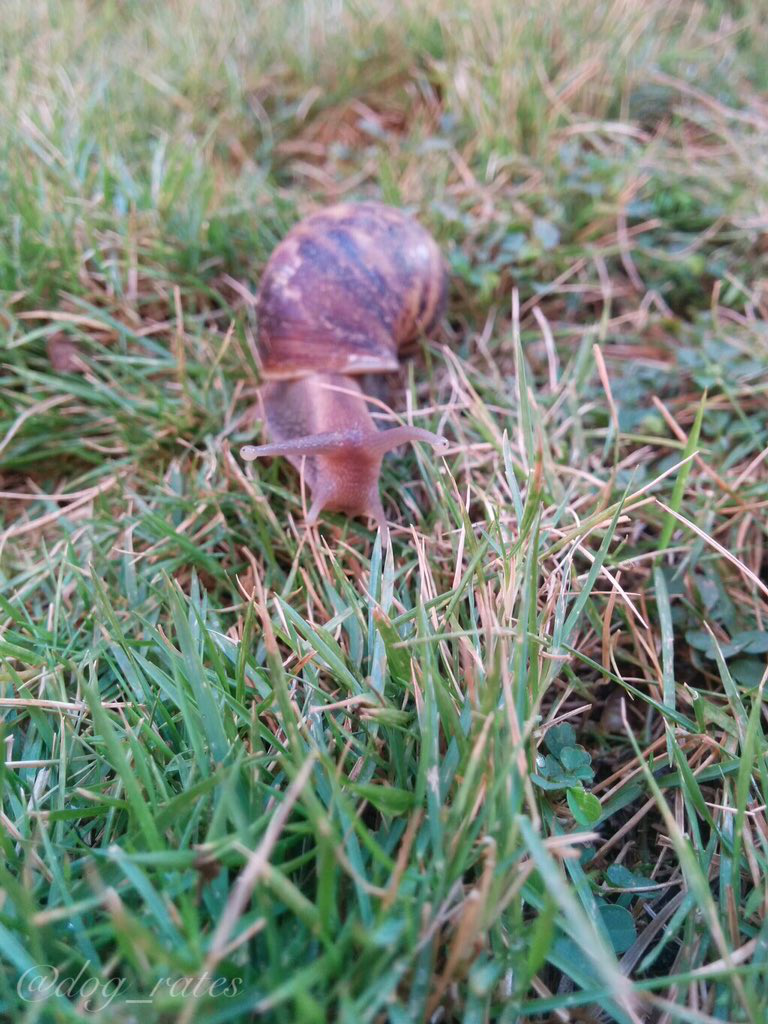

In [36]:
from io import BytesIO
from PIL import Image
url = 'https://pbs.twimg.com/media/CUyDgChWUAAmNSI.jpg'
response = requests.get(url)
image = Image.open(BytesIO(response.content))
image

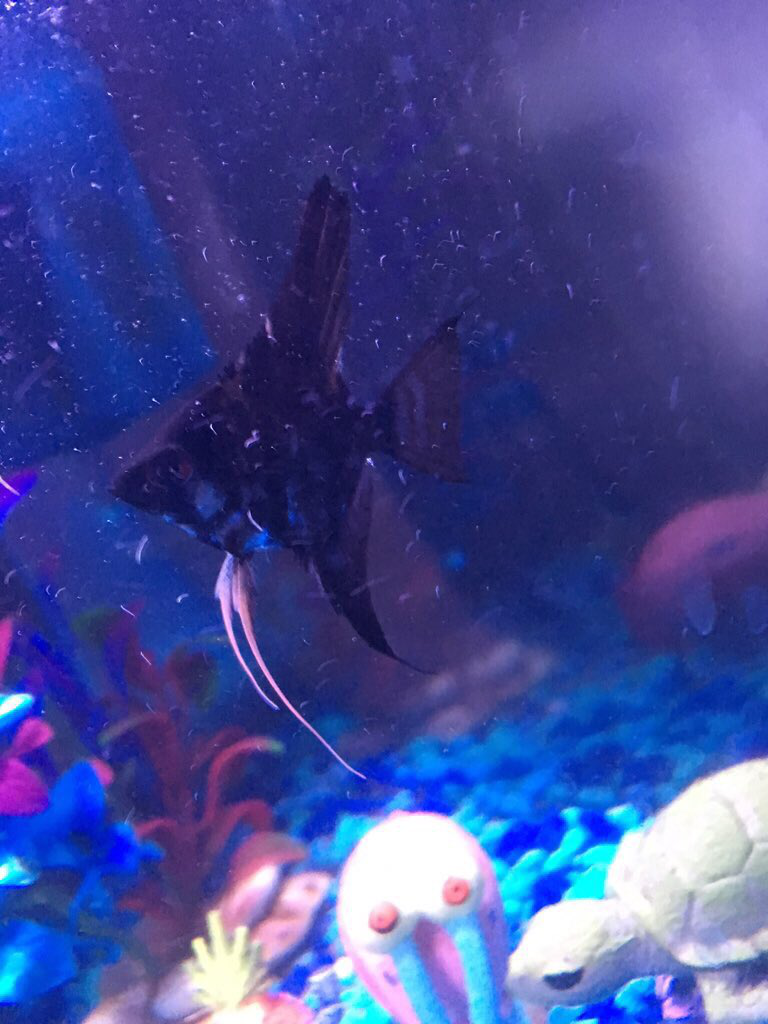

In [37]:
url = 'https://pbs.twimg.com/media/CUize-0WEAAerAK.jpg'
response = requests.get(url)
image = Image.open(BytesIO(response.content))
image

In [38]:
tweet.sample(20)

tweet_id  favourite  retweet
895   759047813560868866       7227     2302
1473  693642232151285760       2790      472
896   758854675097526272       3904     1027
2102  670668383499735048      11452     5537
712   784183165795655680      22513     9374
629   794332329137291264      10686     3088
248   845306882940190720      25225     6039
1736  679527802031484928       2892      823
1976  672984142909456390       1338      593
1821  676533798876651520       2025      621
910   757596066325864448       4808     1219
964   750383411068534784       5005     1309
135   866334964761202691      54720    15546
886   759846353224826880       7433     2265
1919  674262580978937856       1391      498
2228  668237644992782336       6614     3100
29    886267009285017600        117        4
855   763956972077010945        812       61
924   754874841593970688          0     9193
1442  696713835009417216       2613      757

In [39]:
tweet.shape

(2354, 3)

In [40]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   favourite  2354 non-null   int64
 2   retweet    2354 non-null   int64
dtypes: int64(3)
memory usage: 55.2 KB


In [41]:
tweet.describe()

tweet_id      favourite       retweet
count  2.354000e+03    2354.000000   2354.000000
mean   7.426978e+17    8080.968564   3164.797366
std    6.852812e+16   11814.771334   5284.770364
min    6.660209e+17       0.000000      0.000000
25%    6.783975e+17    1415.000000    624.500000
50%    7.194596e+17    3603.500000   1473.500000
75%    7.993058e+17   10122.250000   3652.000000
max    8.924206e+17  132810.000000  79515.000000

In [42]:
sum(tweet.duplicated())

0

### Quality issues

#### Archive Dataset Quality
1. Some denominator value in the rating_denominator column are greater than 10
2. Inaccurate representation of some dog names in the name column
4. Rows containing empty values in the (retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp) are original tweets
5. tweet_id is in integer instead of string
6. timestamp is in object instead of datetime
7. Missing values in the expanded_urls column
8. Missing values in the (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp) columns
9. Some numerator ratings are way above 1000
10. There are 0 values for rating_numerator and rating_denominator
11. The names of dogs starting with lower alphabeltical letters are suspected to be inaccurate

#### Prediction Dataset Quality
1. tweet_id is in integer instead of string
3. Dog prediction names having different formats (starting with lower characters and under_scores)
3. Find rows where all predictions are False
3. Column names are not descriptive

#### Tweet Dataset Quality
1. tweet_id is in integer instead of string

### Tidiness issues

#### Archive Dataset Tidiness
1. HTML Tags on source column are unnecessary
2. The doggo, floofer, pupper and puppo columns are supposed to be in just one column
3. Text column contains url that is synonymous to the url contained in the expanded_urls column
4. Text column contains ratings synonymous to the rating_numerator and rating_denominator

#### Prediction Dataset Tidiness
1. Merge this table with the Archive Dataset table

#### Tweet Dataset Tidiness
1. Merge all tables by tweet_id column

 

## Cleaning Data

In [43]:
# Make copies of original pieces of data
archive_clean = archive.copy()
prediction_clean = prediction.copy()
tweet_clean = tweet.copy()

## Archive Dataset

### Issue 1: tweet_id is in integer instead of string and timestamp is in object instead of datetime

#### Define 
Use the astype method and datetime to convert tweet_id and timestamp to their corresponding datatype

#### Code

In [44]:
archive_clean['tweet_id'] = archive_clean.tweet_id.astype('str')
archive_clean['timestamp'] = pd.to_datetime(archive_clean.timestamp)

#### Test

In [45]:
archive_clean[['tweet_id', 'timestamp']].dtypes

tweet_id                  object
timestamp    datetime64[ns, UTC]
dtype: object

### Issue 2: Text column contains url that is synonymous to the url contained in the expanded_urls column

#### Define 
Use regular expression to extract the url from text

#### Code

In [46]:
archive_clean['url'] = archive_clean.text.str.extract('(http.+)', expand = True)
archive_clean.text = archive_clean.text.str.replace('(http.+)', '', regex=True)

In [47]:
#Drop the expanded_urls column as it will no longer be relevant
archive_clean = archive_clean.drop('expanded_urls', axis=1)

#### Test

In [48]:
assert 'expanded_urls' not in archive_clean.columns

In [49]:
archive_clean.text.unique()

array(["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 ",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 ",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 ',
       ...,
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af ',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of ',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet '],
      dtype=object)

### Issue 3: The doggo, floofer, pupper and puppo columns are supposed to be in just one column

#### Define
Convert doggo, floofer, pupper and puppo columns into one column and change the datatype to category

#### Code

In [50]:
dogs = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']]
dog_stage = dogs.sum(axis=1)
dog_stage.value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
dtype: int64

In [51]:
dog_stage = dog_stage.map(lambda x: x.replace('None', '') 
                          if x.replace('None', '') != '' else 'None')
dog_stage.value_counts()

None            1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
dtype: int64

In [52]:
archive_clean['dog_stage'] = dog_stage

In [53]:
#Replace None value with NAN
archive_clean['dog_stage'] = archive_clean['dog_stage'].replace('None', np.nan)
archive_clean['dog_stage'].value_counts()

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

In [54]:
#There are dog_stage that are joint. I am going to do some findings about the actual dog stage for the corresponding rows using the url provided on the url column
stage = ['doggopupper', 'doggofloofer', 'doggopuppo']
stages = archive_clean.dog_stage.map(lambda x: x in stage)
archive_clean[stages][['tweet_id', 'text', 'dog_stage', 'url']]

tweet_id                                               text  \
191   855851453814013952  Here's a puppo participating in the #ScienceMa...   
200   854010172552949760  At first I thought this was a shy doggo, but i...   
460   817777686764523521  This is Dido. She's playing the lead role in "...   
531   808106460588765185  Here we have Burke (pupper) and Dexter (doggo)...   
565   802265048156610565     Like doggo, like pupper version 2. Both 11/10    
575   801115127852503040  This is Bones. He's being haunted by another d...   
705   785639753186217984  This is Pinot. He's a sophisticated doggo. You...   
733   781308096455073793                Pupper butt 1, Doggo 0. Both 12/10    
778   775898661951791106  RT @dog_rates: Like father (doggo), like son (...   
822   770093767776997377  RT @dog_rates: This is just downright precious...   
889   759793422261743616  Meet Maggie &amp; Lila. Maggie is the doggo, L...   
956   751583847268179968  Please stop sending it pictures that don't eve...   
1063  741067306818797568  This is just downright precious af. 12/10 for ...   
1113  733109485275860992  Like father (doggo), like son (pupper). Both 1...   

         dog_stage                      url  
191     doggopuppo  https://t.co/cMhq16isel  
200   doggofloofer  https://t.co/TXdT3tmuYk  
460    doggopupper  https://t.co/m7isZrOBX7  
531    doggopupper  https://t.co/ANBpEYHaho  
565    doggopupper  https://t.co/9IxWAXFqze  
575    doggopupper  https://t.co/55Dqe0SJNj  
705    doggopupper  https://t.co/f2wmLZTPHd  
733    doggopupper  https://t.co/WQvcPEpH2u  
778    doggopupper  https://t.co/pG2inLaOda  
822    doggopupper  https://t.co/o5J479bZUC  
889    doggopupper  https://t.co/MYwR4DQKll  
956    doggopupper  https://t.co/u2c9c7qSg8  
1063   doggopupper  https://t.co/o5J479bZUC  
1113   doggopupper  https://t.co/pG2inLaOda

In [55]:
correction = {'855851453814013952': 'puppo',
              '854010172552949760': 'floofer',
              '817777686764523521': 'pupper',
              '785639753186217984': 'doggo',
              '801115127852503040': 'pupper',
              '751583847268179968': 'doggo'}
for i in correction.keys():
    archive_clean.loc[archive_clean['tweet_id'] == i, 'dog_stage'] = correction[i]

In [56]:
archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'

In [57]:
#Change datatype to category
archive_clean['dog_stage'] = archive_clean.dog_stage.astype('category')

In [58]:
#Drop the doggo, floofer, pupper and puppo columns as they are no longer necessary
archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [59]:
archive_clean.dog_stage.value_counts()

pupper           247
doggo             85
puppo             30
floofer           10
doggo, pupper      8
Name: dog_stage, dtype: int64

#### Test

In [60]:
assert 'doggo' not in archive_clean.columns
assert 'floofer' not in archive_clean.columns
assert 'pupper' not in archive_clean.columns
assert 'puppo' not in archive_clean.columns
assert 'dog_stage' in archive_clean.columns

In [61]:
assert archive_clean['dog_stage'].dtypes == 'category'

### Issue 4: HTML Tags on source column are unnecessary 

#### Define
Using regular expression, extract the HTML tags attached to the text values in the source column

#### Code

In [62]:
archive_clean.source = archive_clean.source.str.extract(r"(?<=>)(.*)(?=<)")

### Test

In [63]:
archive_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue 5:  Inaccurate representation of some dog names in the name column

#### Define
Names of dogs starting with lower alphabeltical letters are suspected to be inaccurate. Change these names to 'None' using the match and apply function

#### Code

In [64]:
dog_name = archive_clean.name.str.match(r'[a-z].?')
dog_names  = archive_clean['name'][dog_name].unique()
archive_clean['name'] = archive_clean.name.apply(lambda x: 'None' if x in dog_names else x)

In [65]:
archive_clean.name = archive_clean.name.replace('None', '')

#### Test

In [66]:
archive_clean[archive_clean.name.str.islower()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, rating_numerator, rating_denominator, name, url, dog_stage]
Index: []

### Issue 6: Rows containing empty values in the (retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp) are original tweets

#### Define
Locate rows with values on the retweeted column and drop them.

#### Code

In [67]:
retweet_row = list(archive_clean[archive_clean['retweeted_status_id'].isnull()==False].index)
archive_clean.drop(axis=0, index=retweet_row, inplace=True)

In [68]:
#Drop the retweet columns and the in_reply columns
archive_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

#### Test

In [69]:
assert archive_clean.columns.any() not in ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id']

### Issue 7: Text column contains ratings. The rating_numerator and rating_denominator contains unneccesary ratings

#### Define
Using regular expression, extract and replace bad ratings with ratings attached to the text values and drop rows containing unneccesary ratings

#### Code

In [70]:
archive_clean[archive_clean.rating_denominator != 10].text

313     @jonnysun @Lin_Manuel ok jomny I know you're e...
342              @docmisterio account started on 11/15/15
433     The floofs have been released I repeat the flo...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
902     Why does this never happen at my front door......
1068    After so many requests, this is Bretagne. She ...
1120    Say hello to this unbelievably well behaved sq...
1165            Happy 4/20 from the squad! 13/10 for all 
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1598    Yes I do realize a rating of 4/20 would've bee...
1634    Two sneaky puppers were not initially seen, mo...
1635    Someone help the girl is being mugged. Several...
1662    This i

In [71]:
archive_clean[archive_clean.rating_numerator > 16].rating_denominator

55       10
188      10
189      10
290      10
313       0
433      70
516       7
695      10
763      10
902     150
979      10
1120    170
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1634    130
1635    110
1663     16
1712     10
1779    120
1843     80
2074     10
Name: rating_denominator, dtype: int64

In [72]:
bad_rating = (archive_clean.rating_numerator > 16) | (archive_clean.rating_denominator != 10)
bad_ratings = archive_clean[bad_rating].copy()
bad_ratings[['rating_numerator', 'rating_denominator']] = (bad_ratings['text'].str.findall('([0-9]+\.?\d*\/[0-9]+)').str[-1].str.split('/', expand=True))

In [73]:
#Update the masked dataset to our original dataset
rating = bad_ratings[['rating_numerator', 'rating_denominator']]
archive_clean.update(rating)

In [74]:
archive_clean.rating_numerator=archive_clean.rating_numerator.astype(float)

In [75]:
archive_clean[archive_clean.rating_numerator >= 16]

tweet_id                 timestamp              source  \
188   855862651834028034 2017-04-22 19:15:32+00:00  Twitter for iPhone   
189   855860136149123072 2017-04-22 19:05:32+00:00  Twitter for iPhone   
290   838150277551247360 2017-03-04 22:12:52+00:00  Twitter for iPhone   
433   820690176645140481 2017-01-15 17:52:40+00:00  Twitter for iPhone   
516   810984652412424192 2016-12-19 23:06:23+00:00  Twitter for iPhone   
902   758467244762497024 2016-07-28 01:00:57+00:00  Twitter for iPhone   
979   749981277374128128 2016-07-04 15:00:45+00:00           TweetDeck   
1120  731156023742988288 2016-05-13 16:15:54+00:00  Twitter for iPhone   
1228  713900603437621249 2016-03-27 01:29:02+00:00  Twitter for iPhone   
1254  710658690886586372 2016-03-18 02:46:49+00:00  Twitter for iPhone   
1274  709198395643068416 2016-03-14 02:04:08+00:00  Twitter for iPhone   
1351  704054845121142784 2016-02-28 21:25:30+00:00  Twitter for iPhone   
1433  697463031882764288 2016-02-10 16:51:59+00:00  Twitter for iPhone   
1634  684225744407494656 2016-01-05 04:11:44+00:00  Twitter for iPhone   
1635  684222868335505415 2016-01-05 04:00:18+00:00  Twitter for iPhone   
1663  682808988178739200 2016-01-01 06:22:03+00:00  Twitter for iPhone   
1779  677716515794329600 2015-12-18 05:06:23+00:00  Twitter for iPhone   
1843  675853064436391936 2015-12-13 01:41:41+00:00  Twitter for iPhone   
2074  670842764863651840 2015-11-29 05:52:33+00:00  Twitter for iPhone   

                                                   text  rating_numerator  \
188   @dhmontgomery We also gave snoop dogg a 420/10...             420.0   
189   @s8n You tried very hard to portray this good ...             666.0   
290                                  @markhoppus 182/10             182.0   
433   The floofs have been released I repeat the flo...              84.0   
516   Meet Sam. She smiles 24/7 &amp; secretly aspir...              24.0   
902   Why does this never happen at my front door......             165.0   
979   This is Atticus. He's quite simply America af....            1776.0   
1120  Say hello to this unbelievably well behaved sq...             204.0   
1228  Happy Saturday here's 9 puppers on a bench. 99...              99.0   
1254  Here's a brigade of puppers. All look very pre...              80.0   
1274  From left to right:\nCletus, Jerome, Alejandro...              45.0   
1351  Here is a whole flock of puppers.  60/50 I'll ...              60.0   
1433  Happy Wednesday here's a bucket of pups. 44/40...              44.0   
1634  Two sneaky puppers were not initially seen, mo...             143.0   
1635  Someone help the girl is being mugged. Several...             121.0   
1663  I'm aware that I could've said 20/16, but here...              20.0   
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think              144.0   
1843  Here we have an entire platoon of puppers. Tot...              88.0   
2074  After so many requests... here you go.\n\nGood...             420.0   

     rating_denominator     name  \
188                  10            
189                  10            
290                  10            
433                  70            
516                   7      Sam   
902                 150            
979                  10  Atticus   
1120                170            
1228                 90            
1254                 80            
1274                 50            
1351                 50            
1433                 40            
1634                130            
1635                110            
1663                 16            
1779                120            
1843                 80            
2074                 10            

                                                  url dog_stage  
188                                               NaN       NaN  
189                                               NaN       NaN  
290                                               NaN       NaN  
433      

In [76]:
#Drop rows with bad ratings
archive_clean.drop(axis=0, index=[189,188,290,516,979,2074],inplace=True)

Due to inconsistent rating condition, I am going to standardize ratings using the expression; rating = (rating_numerator / rating_denominator) x 10. 
This expression subjects the denominator to a scale of 0, afterwhich I put the values in a separate column called 'ratings

In [77]:
ratings = (archive_clean['rating_numerator'] / archive_clean['rating_denominator'].astype(float)) * 10
archive_clean['ratings'] = ratings

In [78]:
#Drop the rating_numerator and rating_denominator
archive_clean.drop(columns=['rating_numerator', 'rating_denominator'], inplace=True)

In [79]:
archive_clean.ratings.describe()

count    2169.000000
mean       10.621076
std         2.196837
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        15.000000
Name: ratings, dtype: float64

In [80]:
#Lets check the url for ratings that are less than 5
zero = list(archive_clean[archive_clean.ratings <= 4].index)
archive_clean.drop(axis=0, index=zero, inplace=True)

### Test

In [81]:
assert archive_clean.columns.any() not in ['rating_numerator', 'rating_denominator']
assert 'ratings' in archive_clean.columns

In [82]:
archive_clean['ratings']

0       13.0
1       13.0
2       12.0
3       13.0
4       12.0
        ... 
2351     5.0
2352     6.0
2353     9.0
2354     7.0
2355     8.0
Name: ratings, Length: 2116, dtype: float64

In [83]:
archive_clean.shape

(2116, 8)

## Prediction Dataset

### Issue 8: tweet_id is in integer instead of string

#### Define
Use the astype method to convert tweet_id datatype from integer to string

#### Code

In [84]:
prediction_clean.tweet_id = prediction_clean.tweet_id.astype('str')

#### Test

In [85]:
prediction_clean['tweet_id'].dtypes

dtype('O')

### Issue 9: Dog prediction names having different formats (starting with lower characters and underscores ( _ ))

#### Define
Use the capitalize and replace method to capitalize the first letter values and replace the underscores

#### Code

In [86]:
prediction_clean.p1 = prediction_clean.p1.str.capitalize().str.replace('_', ' ')
prediction_clean.p2 = prediction_clean.p2.str.capitalize().str.replace('_', ' ')
prediction_clean.p3 = prediction_clean.p3.str.capitalize().str.replace('_', ' ')

#### Test

In [87]:
prediction_clean[['p1', 'p2', 'p3']].sample(20)

p1                              p2  \
938                     Window shade                   Window screen   
1106                     Tennis ball                          Badger   
1656                        Malamute                  Siberian husky   
949                 Golden retriever              Labrador retriever   
1773  American staffordshire terrier       Staffordshire bullterrier   
41                Labrador retriever                       Chihuahua   
1628                 Tibetan mastiff                 German shepherd   
1854                Brittany spaniel                Blenheim spaniel   
1334                           Skunk            Old english sheepdog   
689                           Kelpie  American staffordshire terrier   
1142                         Doormat                   China cabinet   
1328                       Seat belt                Golden retriever   
6                         Box turtle                      Mud turtle   
1682                  Siberian husky                      Eskimo dog   
1737                Golden retriever                  Cocker spaniel   
1831                    Wooden spoon                    Sliding door   
510              Irish water spaniel                 Standard poodle   
10                  Golden retriever                 Tibetan mastiff   
2018                       Chihuahua                         Meerkat   
1792                          Kuvasz                Golden retriever   

                             p3  
938                       Brass  
1106         Norwegian elkhound  
1656                 Eskimo dog  
949             Tibetan mastiff  
1773               Bull mastiff  
41               French bulldog  
1628                   Leonberg  
1854                    Clumber  
1334             Siberian husky  
689   Staffordshire bullterrier  
1142              Passenger car  
1328            Tibetan mastiff  
6                      Terrapin  
1682         Norwegian elkhound  
1737               Irish setter  
1831                Grand piano  
510                  Greenhouse  
10           Labrador retriever  
2018                    Clumber  
1792             English setter

### Issue 10: Find rows where all predictions are false

#### Define
Query the rows of all dog prediction column and eliminate rows that has False in all

#### Code

In [88]:
prediction_clean = prediction_clean.query('p1_dog == True | p2_dog == True | p3_dog == True')

##### Test

In [89]:
fpredict = (~prediction_clean.p1_dog) & (~prediction_clean.p2_dog) & (~prediction_clean.p3_dog)
false = prediction_clean[fpredict]
false.head()

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

In [90]:
prediction_clean.shape

(1751, 12)

### Issue 11: Column names are not descriptive

#### Define
Use the rename method and rename the non descriptive columns

#### Code

In [91]:
#Rename non-descriptive columns
prediction_clean.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace=True)

#### Test

In [92]:
prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'first_prediction',
       'first_confidence', 'first_dog', 'second_prediction',
       'second_confidence', 'second_dog', 'third_prediction',
       'third_confidence', 'third_dog'],
      dtype='object')

## Tweet Dataset

### Issue 12: tweet_id is in integer instead of string

#### Define
Use the astype method to convert tweet_id datatype from integer to string

#### Code

In [93]:
tweet_clean.tweet_id = tweet_clean.tweet_id.astype('str')

#### Test

In [94]:
tweet_clean.tweet_id.dtypes

dtype('O')

### Issue 13: Merge prediction dataframe, tweet dataframe and archive dataframe together

#### Define
Using the merge function, merge prediction dataframe, tweet dataframe and archive dataframe together

#### Code

In [95]:
archive_merge = pd.merge(archive_clean, prediction_clean, on = 'tweet_id', how = 'inner')
archive_merge = pd.merge(archive_merge, tweet_clean, on = 'tweet_id', how = 'inner')

#### Test

In [96]:
archive_merge.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'name', 'url', 'dog_stage',
       'ratings', 'jpg_url', 'img_num', 'first_prediction', 'first_confidence',
       'first_dog', 'second_prediction', 'second_confidence', 'second_dog',
       'third_prediction', 'third_confidence', 'third_dog', 'favourite',
       'retweet'],
      dtype='object')

#### Code

In [97]:
#Rearrange the columns into a more preferred pattern
column_order = ['tweet_id', 'timestamp', 'name', 'dog_stage', 'ratings', 'img_num', 'favourite','retweet', 'jpg_url', 
                'source', 'url', 'first_prediction', 'first_confidence', 'first_dog', 'second_prediction', 
                'second_confidence', 'second_dog', 'third_prediction', 'third_confidence', 'third_dog', 'text']
archive_merge = archive_merge[column_order]

#### Test

In [98]:
archive_merge.columns

Index(['tweet_id', 'timestamp', 'name', 'dog_stage', 'ratings', 'img_num',
       'favourite', 'retweet', 'jpg_url', 'source', 'url', 'first_prediction',
       'first_confidence', 'first_dog', 'second_prediction',
       'second_confidence', 'second_dog', 'third_prediction',
       'third_confidence', 'third_dog', 'text'],
      dtype='object')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [99]:
archive_merge.to_csv('twitter_archive_master.csv', index=False)

save to SQLite Database

In [100]:
df = pd.read_csv('twitter_archive_master.csv')

In [101]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///master.db')
df.to_sql('twitter_archive_master', engine, index=False)

1671

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [102]:
df = pd.read_csv('twitter_archive_master.csv')

In [103]:
df.head()

tweet_id                  timestamp      name dog_stage  ratings  \
0  892177421306343426  2017-08-01 00:17:27+00:00     Tilly       NaN     13.0   
1  891815181378084864  2017-07-31 00:18:03+00:00    Archie       NaN     12.0   
2  891689557279858688  2017-07-30 15:58:51+00:00     Darla       NaN     13.0   
3  891327558926688256  2017-07-29 16:00:24+00:00  Franklin       NaN     12.0   
4  891087950875897856  2017-07-29 00:08:17+00:00       NaN       NaN     13.0   

   img_num  favourite  retweet  \
0        1      33819     6514   
1        1      25461     4328   
2        1      42908     8964   
3        2      41048     9774   
4        1      20562     3261   

                                           jpg_url              source  ...  \
0  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg  Twitter for iPhone  ...   
1  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg  Twitter for iPhone  ...   
2  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg  Twitter for iPhone  ...   
3  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg  Twitter for iPhone  ...   
4  https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg  Twitter for iPhone  ...   

           first_prediction first_confidence  first_dog   second_prediction  \
0                 Chihuahua         0.323581       True            Pekinese   
1                 Chihuahua         0.716012       True            Malamute   
2               Paper towel         0.170278      False  Labrador retriever   
3                    Basset         0.555712       True    English springer   
4  Chesapeake bay retriever         0.425595       True       Irish terrier   

  second_confidence  second_dog             third_prediction third_confidence  \
0          0.090647        True                     Papillon         0.068957   
1          0.078253        True                       Kelpie         0.031379   
2          0.168086        True                      Spatula         0.040836   
3          0.225770        True  German short-haired pointer         0.175219   
4          0.116317        True              Indian elephant         0.076902   

   third_dog                                               text  
0       True  This is Tilly. She's just checking pup on you....  
1       True  This is Archie. He is a rare Norwegian Pouncin...  
2      False  This is Darla. She commenced a snooze mid meal...  
3       True  This is Franklin. He would like you to stop ca...  
4      False  Here we have a majestic great white breaching ...  

[5 rows x 21 columns]

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           1671 non-null   int64  
 1   timestamp          1671 non-null   object 
 2   name               1179 non-null   object 
 3   dog_stage          260 non-null    object 
 4   ratings            1671 non-null   float64
 5   img_num            1671 non-null   int64  
 6   favourite          1671 non-null   int64  
 7   retweet            1671 non-null   int64  
 8   jpg_url            1671 non-null   object 
 9   source             1671 non-null   object 
 10  url                1671 non-null   object 
 11  first_prediction   1671 non-null   object 
 12  first_confidence   1671 non-null   float64
 13  first_dog          1671 non-null   bool   
 14  second_prediction  1671 non-null   object 
 15  second_confidence  1671 non-null   float64
 16  second_dog         1671 

In [105]:
df['tweet_id'] = df.tweet_id.astype('str')
df['timestamp'] = pd.to_datetime(df.timestamp)

In [106]:
df[['tweet_id', 'timestamp']].dtypes

tweet_id                  object
timestamp    datetime64[ns, UTC]
dtype: object

### Insights:
1. Top Rated Dog Breed
2. Common Dog Names
3. Common Dog Breed
3. Most Common Dog Stage
4. Top 10 Most Favourite Dog Breed
3. Top 10 Most Retweet Dog Breed

In [107]:
df.drop(['second_prediction',
       'second_confidence', 'second_dog', 'third_prediction',
       'third_confidence', 'third_dog'], axis=1, inplace=True)
df.columns

Index(['tweet_id', 'timestamp', 'name', 'dog_stage', 'ratings', 'img_num',
       'favourite', 'retweet', 'jpg_url', 'source', 'url', 'first_prediction',
       'first_confidence', 'first_dog', 'text'],
      dtype='object')

### Visualization

In [108]:
df.describe()

ratings      img_num      favourite       retweet  first_confidence
count  1671.000000  1671.000000    1671.000000   1671.000000       1671.000000
mean     10.901424     1.216637    9273.845003   2830.005386          0.605882
std       1.633751     0.576785   12620.730917   4825.918681          0.266265
min       5.000000     1.000000      81.000000     16.000000          0.044333
25%      10.000000     1.000000    2166.500000    651.000000          0.379726
50%      11.000000     1.000000    4449.000000   1440.000000          0.607401
75%      12.000000     1.000000   11723.500000   3261.000000          0.852629
max      14.000000     4.000000  132810.000000  79515.000000          0.999984

##### Relationship and Correlation Coefficient between Numerical Variables

In [109]:
num_var = df[['retweet', 'favourite', 'ratings', 'img_num', 'first_confidence']]

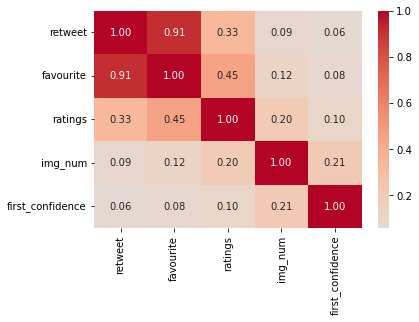

In [110]:
sns.heatmap(num_var.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm', center = 0);

There is a correlation between retweet and favourite, retweet and ratings, favourite and ratings

c:\Users\Mac\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


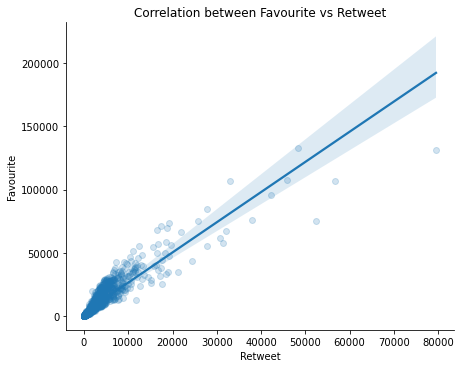

In [111]:
sns.lmplot(x='retweet', y='favourite', data=df, size=5, aspect=1.3, scatter_kws={'alpha':1/5});
plt.xlabel('Retweet');
plt.ylabel('Favourite');
plt.title('Correlation between Favourite vs Retweet');

Only few tweets get high retweets

##### Correlation betweet retweet and favourite by ratings

<Figure size 936x504 with 0 Axes>

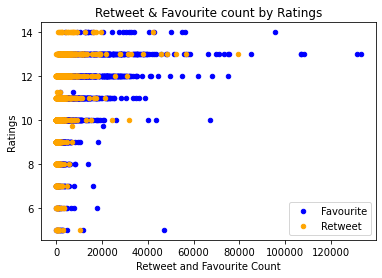

In [112]:
plt.figure(figsize = (13,7))
favourite = df.plot(kind='scatter', y='ratings', x='favourite', color='blue')    
retweet = df.plot(kind='scatter', y='ratings', x='retweet', color='orange', ax=favourite)    

plt.xlabel('Retweet and Favourite Count')
plt.ylabel('Ratings')
plt.title('Retweet & Favourite count by Ratings')
plt.legend(["Favourite", "Retweet"]);
plt.show()

The Favourite counts is always bigger than the Retweet counts

There is a slight increase in Retweet and Favourite with increase in ratings

The highest retweet and favourite are about 76,000 and above 130,000 respectively with a rating of 13

##### 1. Top Rated Dog Breed

In [113]:
df.query('ratings == 14').first_prediction.value_counts()

Pembroke                   4
Golden retriever           3
French bulldog             2
Standard poodle            1
Gordon setter              1
Irish setter               1
Pomeranian                 1
Rottweiler                 1
Bedlington terrier         1
Bloodhound                 1
Samoyed                    1
Military uniform           1
Black-and-tan coonhound    1
Chihuahua                  1
Old english sheepdog       1
Lakeland terrier           1
Laptop                     1
Eskimo dog                 1
Name: first_prediction, dtype: int64

In [114]:
df.query('ratings == 14').head(5)

tweet_id                 timestamp    name dog_stage  ratings  \
8   890240255349198849 2017-07-26 15:59:51+00:00  Cassie     doggo     14.0   
33  884441805382717440 2017-07-10 15:58:53+00:00     NaN       NaN     14.0   
46  881536004380872706 2017-07-02 15:32:16+00:00     NaN    pupper     14.0   
58  878057613040115712 2017-06-23 01:10:23+00:00    Emmy       NaN     14.0   
92  868880397819494401 2017-05-28 17:23:24+00:00  Walter       NaN     14.0   

    img_num  favourite  retweet  \
8         1      32467     7711   
33        1      27478     5856   
46        1      50199    16570   
58        1      42876     7181   
92        1      55098    12518   

                                              jpg_url              source  \
8     https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg  Twitter for iPhone   
33    https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg  Twitter for iPhone   
46  https://pbs.twimg.com/ext_tw_video_thumb/88153...  Twitter for iPhone   
58    https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg  Twitter for iPhone   
92    https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg  Twitter for iPhone   

                        url first_prediction  first_confidence  first_dog  \
8   https://t.co/t1bfwz5S2A         Pembroke          0.511319       True   
33  https://t.co/vvBOcC2VdC         Pembroke          0.993225       True   
46  https://t.co/ghXBIIeQZF          Samoyed          0.281463       True   
58  https://t.co/cwtWnHMVpe   French bulldog          0.839097       True   
92  https://t.co/r28jFx9uyF           Laptop          0.153718      False   

                                                 text  
8   This is Cassie. She is a college pup. Studying...  
33  I present to you, Pup in Hat. Pup in Hat is gr...  
46  Here is a pupper approaching maximum borkdrive...  
58  This is Emmy. She was adopted today. Massive r...  
92  This is Walter. He won't start hydrotherapy wi...

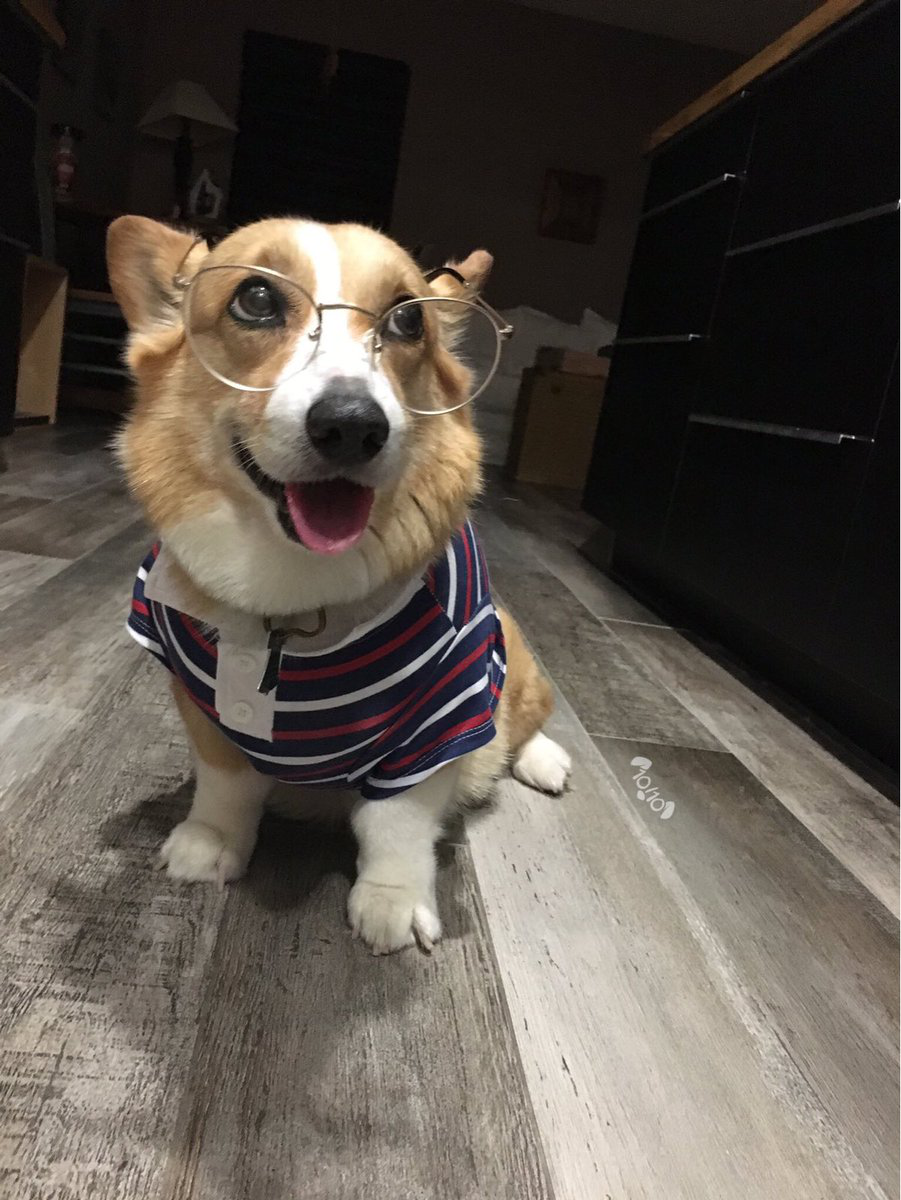

In [116]:
#Lets take a look on the picture of a dog with a rating of 14
url = 'https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg'
response = requests.get(url)
Image.open(BytesIO(response.content))

With the standardized rating, Pembroke, Golden retriever, French bulldog, Pomeranian, Military uniform, Rottweiler, Old english sheepdog, Chihuahua, Black-and-tan coonhound, Irish setter, Lakeland terrier, Gordon setter, Samoyed, Bedlington terrier, Bloodhound, Laptop, Standard poodle, Eskimo dog came top with ratings of 14.

There are inaccuracy in the Dog breeds prediction present in our dataset (Laptop, Military Uniform). 

##### 2. Common Dog Names

In [117]:
df.name.value_counts()

Charlie       10
Cooper        10
Lucy          10
Oliver         9
Tucker         9
              ..
Carbon         1
Klein          1
DonDon         1
Chevy          1
Christoper     1
Name: name, Length: 829, dtype: int64

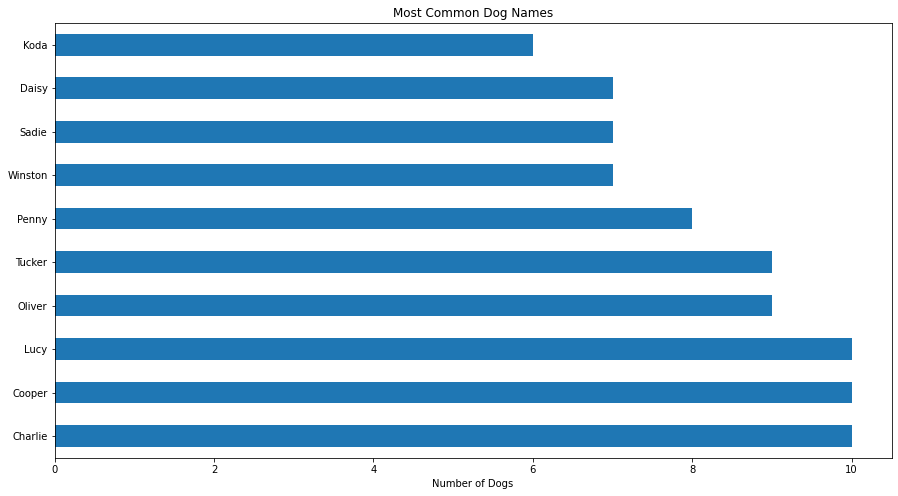

In [120]:
df.name.value_counts()[0:10].plot(kind = 'barh', figsize=(15,8), title='Most Common Dog Names').set_xlabel("Number of Dogs");

Cooper, Lucy and Charlie are Top 3 most common names for dogs present in our dataset

##### 3. Most Common Dog Breed

In [121]:
df.first_prediction.value_counts().head(10)

Golden retriever      138
Labrador retriever     95
Pembroke               87
Chihuahua              78
Pug                    53
Chow                   41
Samoyed                40
Pomeranian             38
Toy poodle             38
Malamute               29
Name: first_prediction, dtype: int64

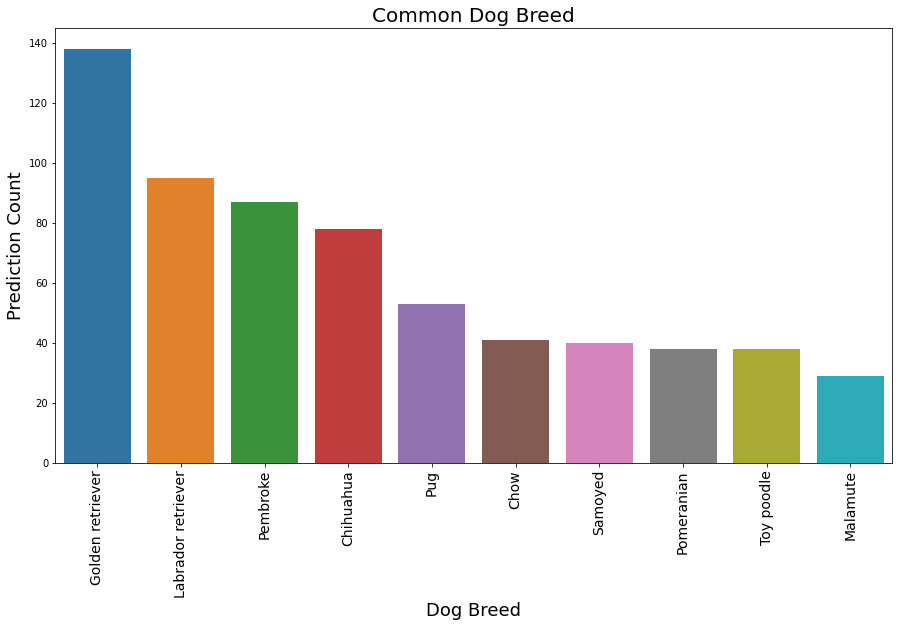

In [122]:
plt.figure(figsize = (15,8))
ax=sns.barplot(x=df.first_prediction.value_counts()[0:10].index, y=df.first_prediction.value_counts()[0:10], data=df);
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 14);
plt.xlabel('Dog Breed', fontsize = 18);
plt.ylabel('Prediction Count', fontsize = 18);
plt.title('Common Dog Breed', fontsize = 20);


In [123]:
df.query('first_prediction == "Golden retriever"')

tweet_id                 timestamp     name dog_stage  \
13    889531135344209921 2017-07-24 17:02:04+00:00   Stuart     puppo   
15    888917238123831296 2017-07-23 00:22:39+00:00      Jim       NaN   
16    888804989199671297 2017-07-22 16:56:37+00:00     Zeke       NaN   
36    883482846933004288 2017-07-08 00:28:19+00:00    Bella       NaN   
38    883117836046086144 2017-07-07 00:17:54+00:00      NaN       NaN   
...                  ...                       ...      ...       ...   
1615  667182792070062081 2015-11-19 03:29:07+00:00  Timison       NaN   
1620  667160273090932737 2015-11-19 01:59:39+00:00  Bradlay       NaN   
1627  667044094246576128 2015-11-18 18:17:59+00:00      NaN       NaN   
1651  666345417576210432 2015-11-16 20:01:42+00:00      NaN       NaN   
1661  666063827256086533 2015-11-16 01:22:45+00:00      NaN       NaN   

      ratings  img_num  favourite  retweet  \
13       13.0        1      15359     2321   
15       12.0        1      29611     4709   
16       13.0        1      26080     4559   
36        5.0        1      46860    10407   
38       13.0        2      37914     6949   
...       ...      ...        ...      ...   
1615     10.0        1      15075     6618   
1620     11.0        1        268       66   
1627     12.0        1        198       54   
1651     10.0        1        307      146   
1661     10.0        1        496      232   

                                              jpg_url              source  \
13    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg  Twitter for iPhone   
15    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg  Twitter for iPhone   
16    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg  Twitter for iPhone   
36    https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg  Twitter for iPhone   
38    https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg  Twitter for iPhone   
...                                               ...                 ...   
1615  https://pbs.twimg.com/media/CUJPNjOWsAAZRqP.jpg  Twitter for iPhone   
1620  https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg  Twitter for iPhone   
1627  https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg  Twitter for iPhone   
1651  https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg  Twitter for iPhone   
1661  https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg  Twitter for iPhone   

                          url  first_prediction  first_confidence  first_dog  \
13    https://t.co/y70o6h3isq  Golden retriever          0.953442       True   
15    https://t.co/chxruIOUJN  Golden retriever          0.714719       True   
16    https://t.co/HTQ77yNQ5K  Golden retriever          0.469760       True   
36    https://t.co/qjrljjt948  Golden retriever          0.943082       True   
38    https://t.co/Se5fZ9wp5E  Golden retriever          0.949562       True   
...                       ...               ...               ...        ...   
1615  https://t.co/s2yYuHabWl  Golden retriever          0.949892       True   
1620  https://t.co/DKhgkMx4N1  Golden retriever          0.471351       True   
1627  https://t.co/QZAnwgnOMB  Golden retriever          0.765266       True   
1651  https://t.co/VFKG1vxGjB  Golden retriever          0.858744       True   
1661  https://t.co/RhUEAloehK  Golden retriever          0.775930       True   

                                                   text  
13    This is Stuart. He's sporting his favorite fan...  
15    This is Jim. He found a fren. Taught him how t...  
16    This is Zeke. He has a new stick. Very proud o...  
36    This is Bella. She hopes her smile made you sm...  
38    Please only send dogs. We don't rate mechanics...  
...                                                 ...  
1615  This is Timison. He just told an awful joke bu...  
1620  This is Bradlay. He is a Ronaldinho Matsuyama ...  
1627                                   12/10 gimme now   
1651  Look at this jokester thinking seat belt laws ...  
1661  This is the happiest dog you will ever see. Ve...  

[13

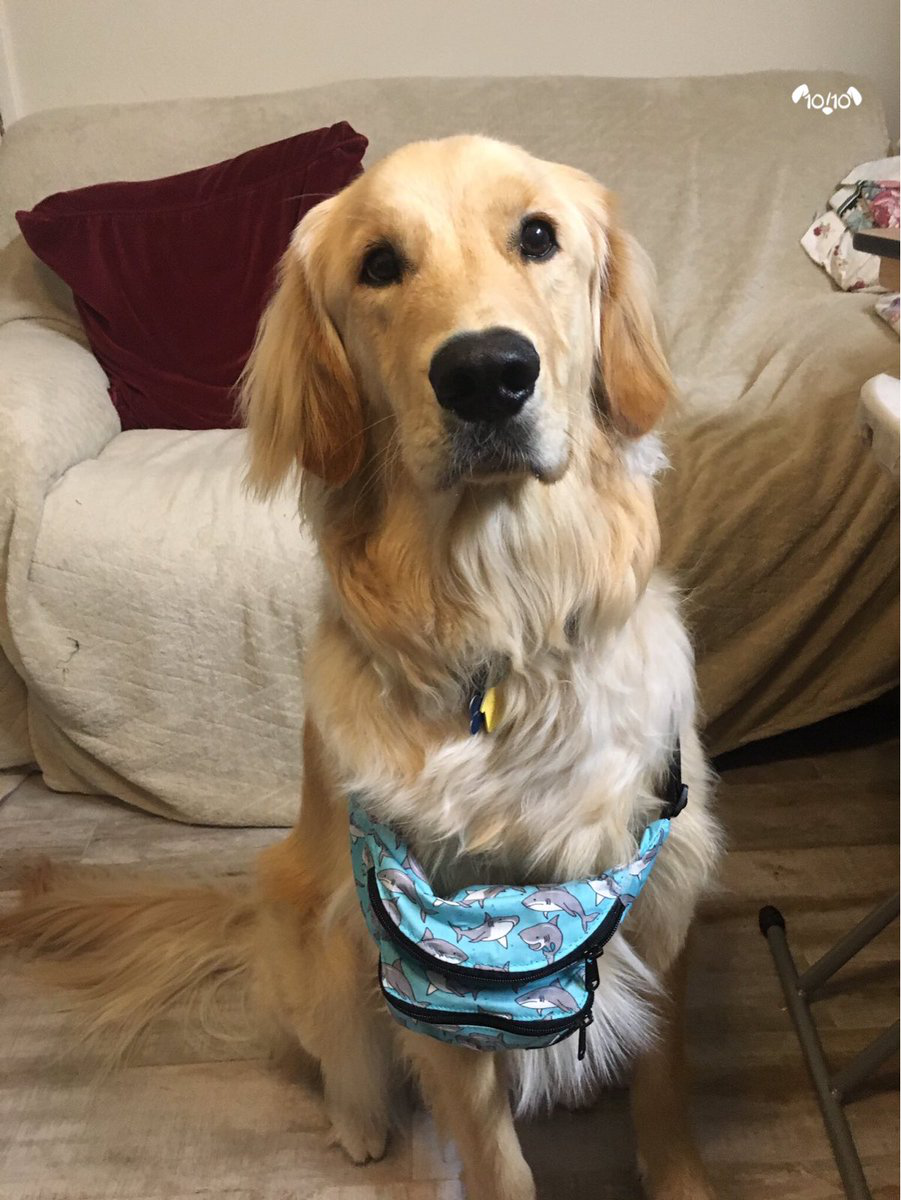

In [124]:
#Lets take a look on the photo of the most common dog breed 'Golden retriever' 
url = 'https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg'
response = requests.get(url)
Image.open(BytesIO(response.content))

The Golden retriever is the most common Dog breed with a count of 138.

##### 4. Most Common Dog Stage

In [125]:
df.dog_stage.value_counts()

pupper           170
doggo             55
puppo             22
floofer            8
doggo, pupper      5
Name: dog_stage, dtype: int64

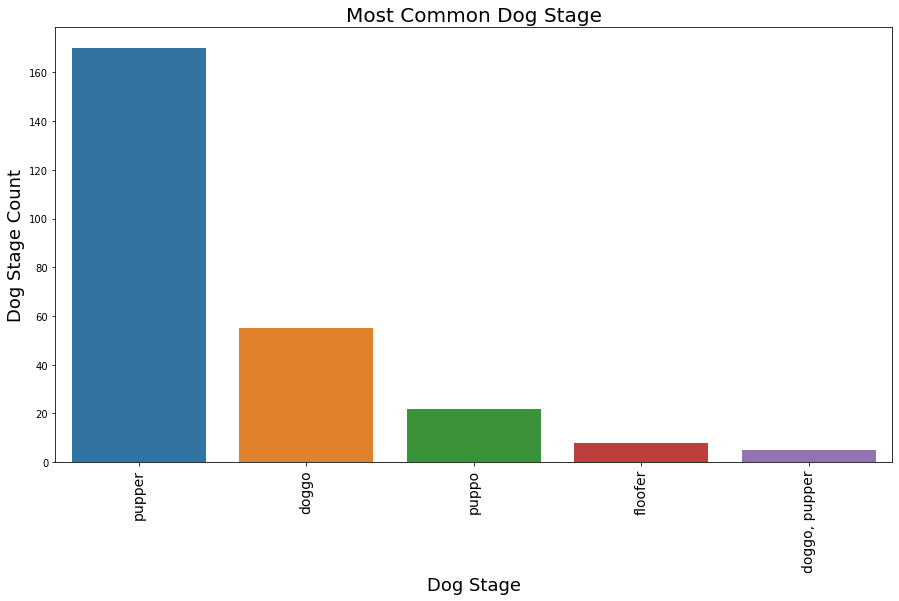

In [126]:
plt.figure(figsize = (15,8))
ax=sns.barplot(x=df.dog_stage.value_counts().index, y=df.dog_stage.value_counts(), data=df);
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 14);
plt.xlabel('Dog Stage', fontsize = 18);
plt.ylabel('Dog Stage Count', fontsize = 18);
plt.title('Most Common Dog Stage', fontsize = 20);

Pupper is the most common Dog stage in our dataset while doggopupper which is a combination of two dogs (Doggo and Pupper) is the least common with a count of 5 in the over all dataset

##### 5. Top 10 Most Favourite Dog Breed

In [127]:
df.groupby(['first_prediction']).favourite.sum().sort_values(ascending=False)[:10]

first_prediction
Golden retriever      1690700
Labrador retriever    1123850
Pembroke               989409
Chihuahua              674326
Samoyed                542991
French bulldog         465738
Chow                   404241
Pug                    319497
Cocker spaniel         315825
Pomeranian             299114
Name: favourite, dtype: int64

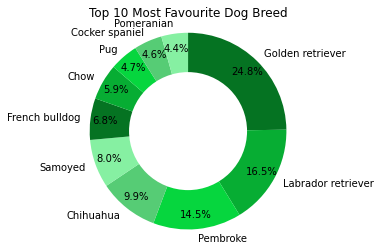

In [128]:
plt.pie(df.groupby(['first_prediction']).favourite.sum().sort_values(ascending=False)[0:10], colors = ['#057322','#07ad33','#06d63e','#56cc75', '#86f0a2'], labels=df.groupby(['first_prediction']).favourite.sum().sort_values(ascending=False)[0:10].index, autopct='%1.1f%%', startangle=90,
         pctdistance=0.85, counterclock = False, labeldistance=1.1)
plt.axis('square');

#circle
centre_circle = plt.Circle((0,0),0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Top 10 Most Favourite Dog Breed');
plt.show()

Out of the Top 10 dog breed, Golden retriever has the highest overall favourite click in the dataset with a 24.8%

##### 6. Top 10 Most Retweeted Dog Breed

In [129]:
df.groupby(['first_prediction']).retweet.sum().sort_values(ascending=False)[:10]

first_prediction
Golden retriever      500441
Labrador retriever    366682
Pembroke              279051
Chihuahua             220130
Samoyed               184922
French bulldog        121782
Chow                  116361
Pomeranian            106518
Cocker spaniel        100561
Pug                    98826
Name: retweet, dtype: int64

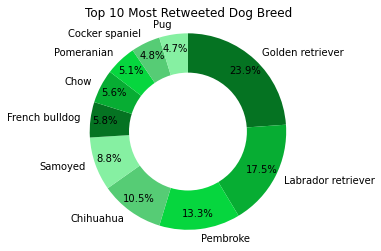

In [130]:
plt.pie(df.groupby(['first_prediction']).retweet.sum().sort_values(ascending=False)[0:10], colors = ['#057322','#07ad33','#06d63e','#56cc75', '#86f0a2'], labels=df.groupby(['first_prediction']).retweet.sum().sort_values(ascending=False)[0:10].index, autopct='%1.1f%%', startangle=90,
         pctdistance=0.85, counterclock = False, labeldistance=1.1)
plt.axis('square');

#circle
centre_circle = plt.Circle((0,0),0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Top 10 Most Retweeted Dog Breed');
plt.show()


Out of the Top 10 dog breed, Golden retriever has the highest overall retweet click in the dataset with a 23.9%

## Limitations

* Not all data in our dataset had a documented Dog Stage.

* There were inaccuracies in the dog names. This made names of dogs for some data unaccounted for.

* The first prediction column had wrong predictions.